### Import Statements

In [114]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
pd.options.display.float_format = '{:,.2f}'.format # 12,345,678.90

plt.style.use({'figure.facecolor':'white'}) # white Matplotlib background

In [2]:
def image_import(path):
    """ Because the <img src=...> does not work in Pycharm Notebook,
    I have to manually import and show image in the output """

    plt.figure(figsize=(10,5))
    image = plt.imread(path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# Setup and Context

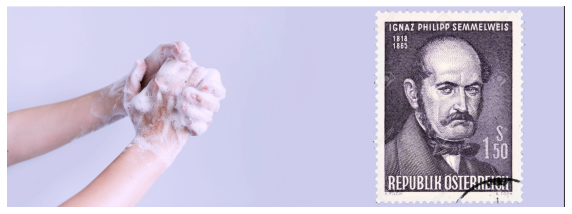

In [3]:
image_import('images/gugIA5r.png')

### Introduction

Dr. Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the
Vienna General Hospital. In the past people thought of illness as caused by
"bad air" or evil spirits. But in the 1800s Doctors started looking more at
anatomy, doing autopsies and started making arguments based on data.
Dr. Semmelweis suspected that something was going wrong with the procedures at
Vienna General Hospital. Semmelweis wanted to figure out why so many women in
maternity wards were dying from childbed fever (i.e., [puerperal fever](
https://en.wikipedia.org/wiki/Postpartum_infections)).

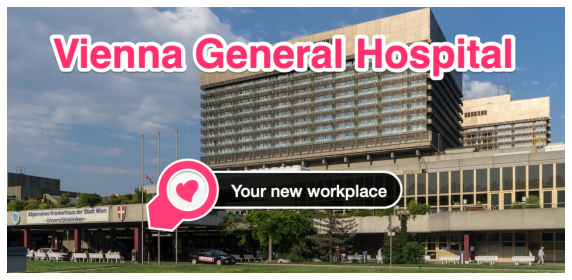

In [4]:
image_import('images/lSyNUwR.png')

Today you will become Dr. Semmelweis.
This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the
same data collected from 1841 to 1849.


### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the
[full text with the original tables in German](
http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861),
but an excellent [English translation can be found here](
http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

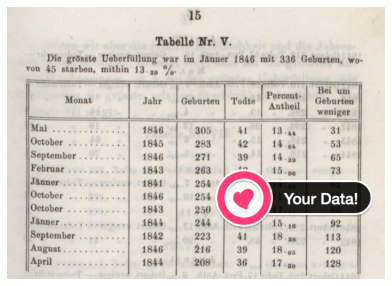

In [5]:
image_import('images/6HfLtaC.png')

### Notebook Presentation

### Read the Data

In [6]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: <br>
Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place a month?
* What were the average number of deaths that took place month?

In [7]:
print(df_yearly.shape)
print(df_monthly.shape)

(12, 4)
(98, 3)


In [8]:
print(f"Columns in df_yearly: {list(df_yearly.columns)}")
print(f"Columns in df_monthly: {list(df_monthly.columns)}")

Columns in df_yearly: ['year', 'births', 'deaths', 'clinic']
Columns in df_monthly: ['date', 'births', 'deaths']


In [9]:
print(f"Years, included in dataset: {df_yearly['year'].unique()}")

Years, included in dataset: [1841 1842 1843 1844 1845 1846]


### Check for Nan Values and Duplicates

In [10]:
print(f"There are duplicates in df_yearly: "
      f"{df_yearly.duplicated().values.any()} \n"
      f"There are duplicates in df_monthly: "
      f"{df_monthly.duplicated().values.any()}")

print(f"There are NaN values in df_yearly: "
      f"{df_yearly.isna().values.any()} \n"
      f"There are NaN values in df_monthly: "
      f"{df_monthly.isna().values.any()}")

There are duplicates in df_yearly: False 
There are duplicates in df_monthly: False
There are NaN values in df_yearly: False 
There are NaN values in df_monthly: False


### Descriptive Statistics

In [11]:
df_yearly.describe()

year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

In [12]:
df_monthly.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

### Percentage of Women Dying in Childbirth

**Challenge**: <br>
How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who
died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per
100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [13]:
deaths_pct = pd.DataFrame(df_yearly['deaths'] / df_yearly['births'])

df_yearly.insert(3, 'deaths_pct', deaths_pct)

In [14]:
df_yearly_combine = df_yearly.groupby('year', as_index=False).sum()[['year',
                                                                     'births',
                                                                     'deaths']]
df_yearly_combine

year  births  deaths
0  1841    5478     323
1  1842    5946     720
2  1843    5799     438
3  1844    6113     328
4  1845    6733     307
5  1846    7764     564

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: <br>
Create a [Matplotlib chart](
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html)
with twin y-axes. It should look something like this:

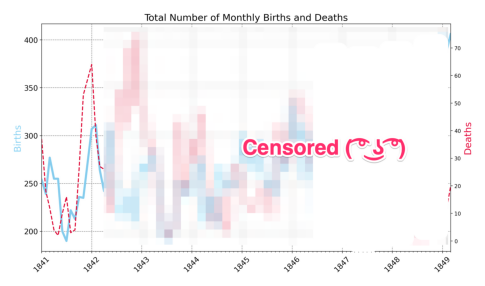

In [15]:
image_import('images/F9DOJxx.png')

* Format the x-axis using locators for the years and months <br>
(*Hint*: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

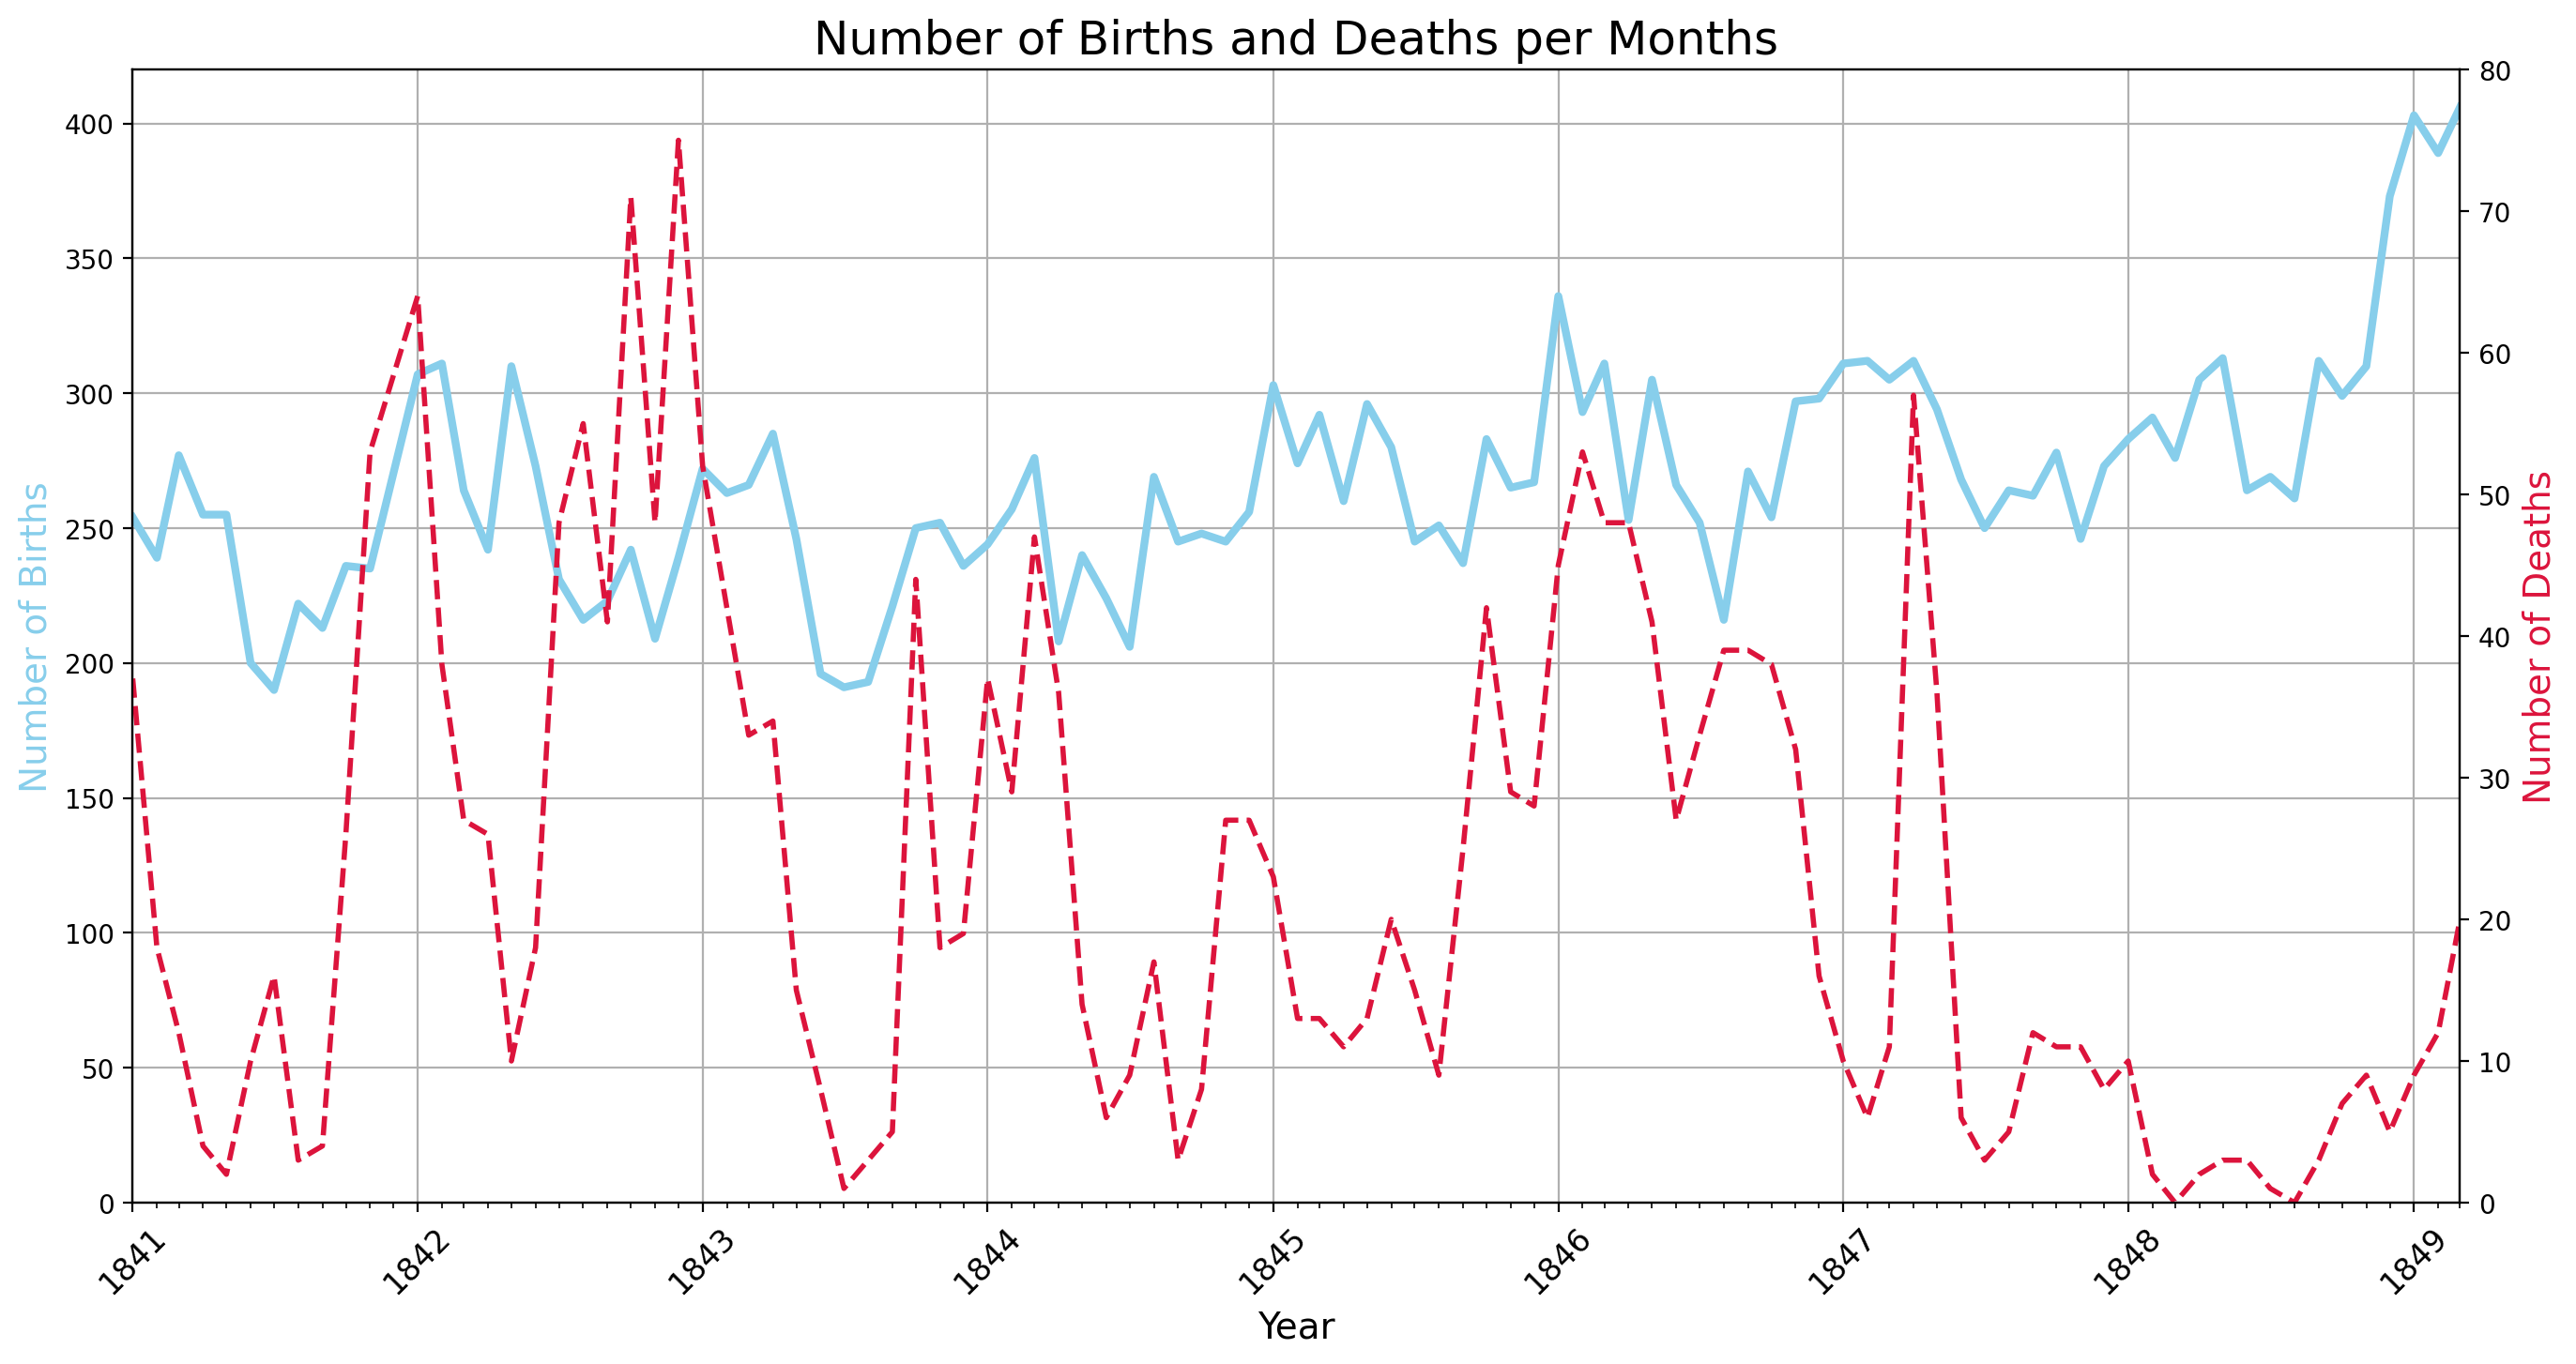

In [16]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Births and Deaths per Months', fontsize=18)
plt.grid()
plt.xticks(rotation=45, fontsize=12)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_monthly['date'],
         df_monthly['births'],
         color='skyblue',
         linestyle='-',
         linewidth=3)

ax2.plot(df_monthly['date'],
         df_monthly['deaths'],
         color='crimson',
         linestyle='--',
         linewidth=2)

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Births', color='skyblue', fontsize=14)
ax2.set_ylabel('Number of Deaths', color='crimson', fontsize=14)

ax1.set_xlim(df_monthly['date'].min(), df_monthly['date'].max())
ax1.set_ylim(0, 420)
ax2.set_ylim(0, 80)

ax1.xaxis.set_minor_locator(mdates.MonthLocator()) # tick locators on x-axis

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Challenge**: <br>
Use plotly to create line charts of the births and deaths of the two different
clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [17]:
df_yearly

year  births  deaths  deaths_pct    clinic
0   1841    3036     237        0.08  clinic 1
1   1842    3287     518        0.16  clinic 1
2   1843    3060     274        0.09  clinic 1
3   1844    3157     260        0.08  clinic 1
4   1845    3492     241        0.07  clinic 1
5   1846    4010     459        0.11  clinic 1
6   1841    2442      86        0.04  clinic 2
7   1842    2659     202        0.08  clinic 2
8   1843    2739     164        0.06  clinic 2
9   1844    2956      68        0.02  clinic 2
10  1845    3241      66        0.02  clinic 2
11  1846    3754     105        0.03  clinic 2

In [18]:
birth_lines = px.line(df_yearly,
                      x='year',
                      y='births',
                      color='clinic',
                      title='Number of Births per Year')

birth_lines.update_layout(xaxis_title='Year',
                          yaxis_title='Number of Births')

birth_lines.show()

In [19]:
df_yearly.groupby('clinic').describe()['births']

count     mean    std      min      25%      50%      75%      max
clinic                                                                      
clinic 1   6.00 3,340.33 368.54 3,036.00 3,084.25 3,222.00 3,440.75 4,010.00
clinic 2   6.00 2,965.17 472.66 2,442.00 2,679.00 2,847.50 3,169.75 3,754.00

In [20]:
death_lines = px.line(df_yearly,
                      x='year',
                      y='deaths',
                      color='clinic',
                      title='Number of Deaths per Year')

death_lines.update_layout(xaxis_title='Year',
                          yaxis_title='Number of Deaths')

death_lines.show()

In [21]:
df_yearly.groupby('clinic').describe()['deaths']

count   mean    std    min    25%    50%    75%    max
clinic                                                          
clinic 1   6.00 331.50 123.76 237.00 245.75 267.00 412.75 518.00
clinic 2   6.00 115.17  55.72  66.00  72.50  95.50 149.25 202.00

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: <br>
Calculate the proportion of maternal deaths per clinic.
That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame
by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2
(i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over
year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [22]:
df_yearly

year  births  deaths  deaths_pct    clinic
0   1841    3036     237        0.08  clinic 1
1   1842    3287     518        0.16  clinic 1
2   1843    3060     274        0.09  clinic 1
3   1844    3157     260        0.08  clinic 1
4   1845    3492     241        0.07  clinic 1
5   1846    4010     459        0.11  clinic 1
6   1841    2442      86        0.04  clinic 2
7   1842    2659     202        0.08  clinic 2
8   1843    2739     164        0.06  clinic 2
9   1844    2956      68        0.02  clinic 2
10  1845    3241      66        0.02  clinic 2
11  1846    3754     105        0.03  clinic 2

In [23]:
avg_maternal_death_cl1 = df_yearly[df_yearly['clinic'] == 'clinic 1'].mean()['deaths_pct']
avg_maternal_death_cl2 = df_yearly[df_yearly['clinic'] == 'clinic 2'].mean()['deaths_pct']

print(f"Average maternal death in clinic 1 = {avg_maternal_death_cl1:.2f} \n"
      f"Average maternal death in clinic 2 = {avg_maternal_death_cl2:.2f}")

Average maternal death in clinic 1 = 0.10 
Average maternal death in clinic 2 = 0.04


### Plotting the Proportion of Yearly Deaths by Clinic

In [24]:
death_pct_lines = px.line(df_yearly,
                          x='year',
                          y='deaths_pct',
                          color='clinic',
                          title='Death Percentage per Year'
                          )
death_pct_lines.update_layout(xaxis_title='Year',
                              yaxis_title='Death Percentage')
death_pct_lines.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947.
In fact, he ordered people to wash their hands with chlorine (instead of water).

In [25]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of
deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis
ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [26]:
deaths_pct_monthly = df_monthly['deaths'] / df_monthly['births']

df_monthly.insert(loc=3, column='deaths_pct', value=deaths_pct_monthly)

In [27]:
df_monthly_before = df_monthly.loc[df_monthly['date'] < handwashing_start]
df_monthly_after = df_monthly.loc[df_monthly['date'] >= handwashing_start]

In [28]:
avg_death_rate_before = df_monthly_before['deaths'].sum() / \
                        df_monthly_before['births'].sum()
avg_death_rate_after = df_monthly_after['deaths'].sum() / \
                        df_monthly_after['births'].sum()

print(f"Average Death Rate Before 1847-06-01 = {avg_death_rate_before:.2f} \n"
      f"Average Death Rate After 1847-06-01 = {avg_death_rate_after:.2f}")

Average Death Rate Before 1847-06-01 = 0.11 
Average Death Rate After 1847-06-01 = 0.02


### Calculate a Rolling Average of the Death Rate

**Challenge**: <br>
Create a DataFrame that has the 6-month rolling average death rate prior to
mandatory handwashing.

*Hint*: <br>
You'll need to set the dates as the index in order to avoid the date column
being dropped during the calculation.

In [29]:
df_monthly_before_rolling_avg = df_monthly_before.rolling(window=6,
                                                          on='date').mean()
df_monthly_before_rolling_avg.fillna(0)
df_monthly_before_rolling_avg

date  births  deaths  deaths_pct
0  1841-01-01     nan     nan         nan
1  1841-02-01     nan     nan         nan
2  1841-03-01     nan     nan         nan
3  1841-04-01     nan     nan         nan
4  1841-05-01     nan     nan         nan
..        ...     ...     ...         ...
71 1847-01-01  274.50   29.00        0.11
72 1847-02-01  290.50   23.50        0.08
73 1847-03-01  296.17   18.83        0.07
74 1847-04-01  305.83   22.00        0.07
75 1847-05-01  305.33   22.67        0.07

[76 rows x 4 columns]

### Highlighting Subsections of a Line Chart

**Challenge**: <br>
Copy-paste and then modify the Matplotlib chart from before to plot the monthly
death rates (instead of the total number of births and deaths).
The chart should look something like this:

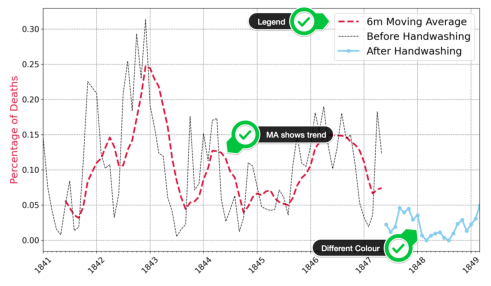

In [30]:
image_import('images/X6TQe0R.png')

* Add 3 separate lines to the plot: the death rate before handwashing,
after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimson line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the
[code snippet in the documentation to see how you can add a legend](
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)
to the chart.

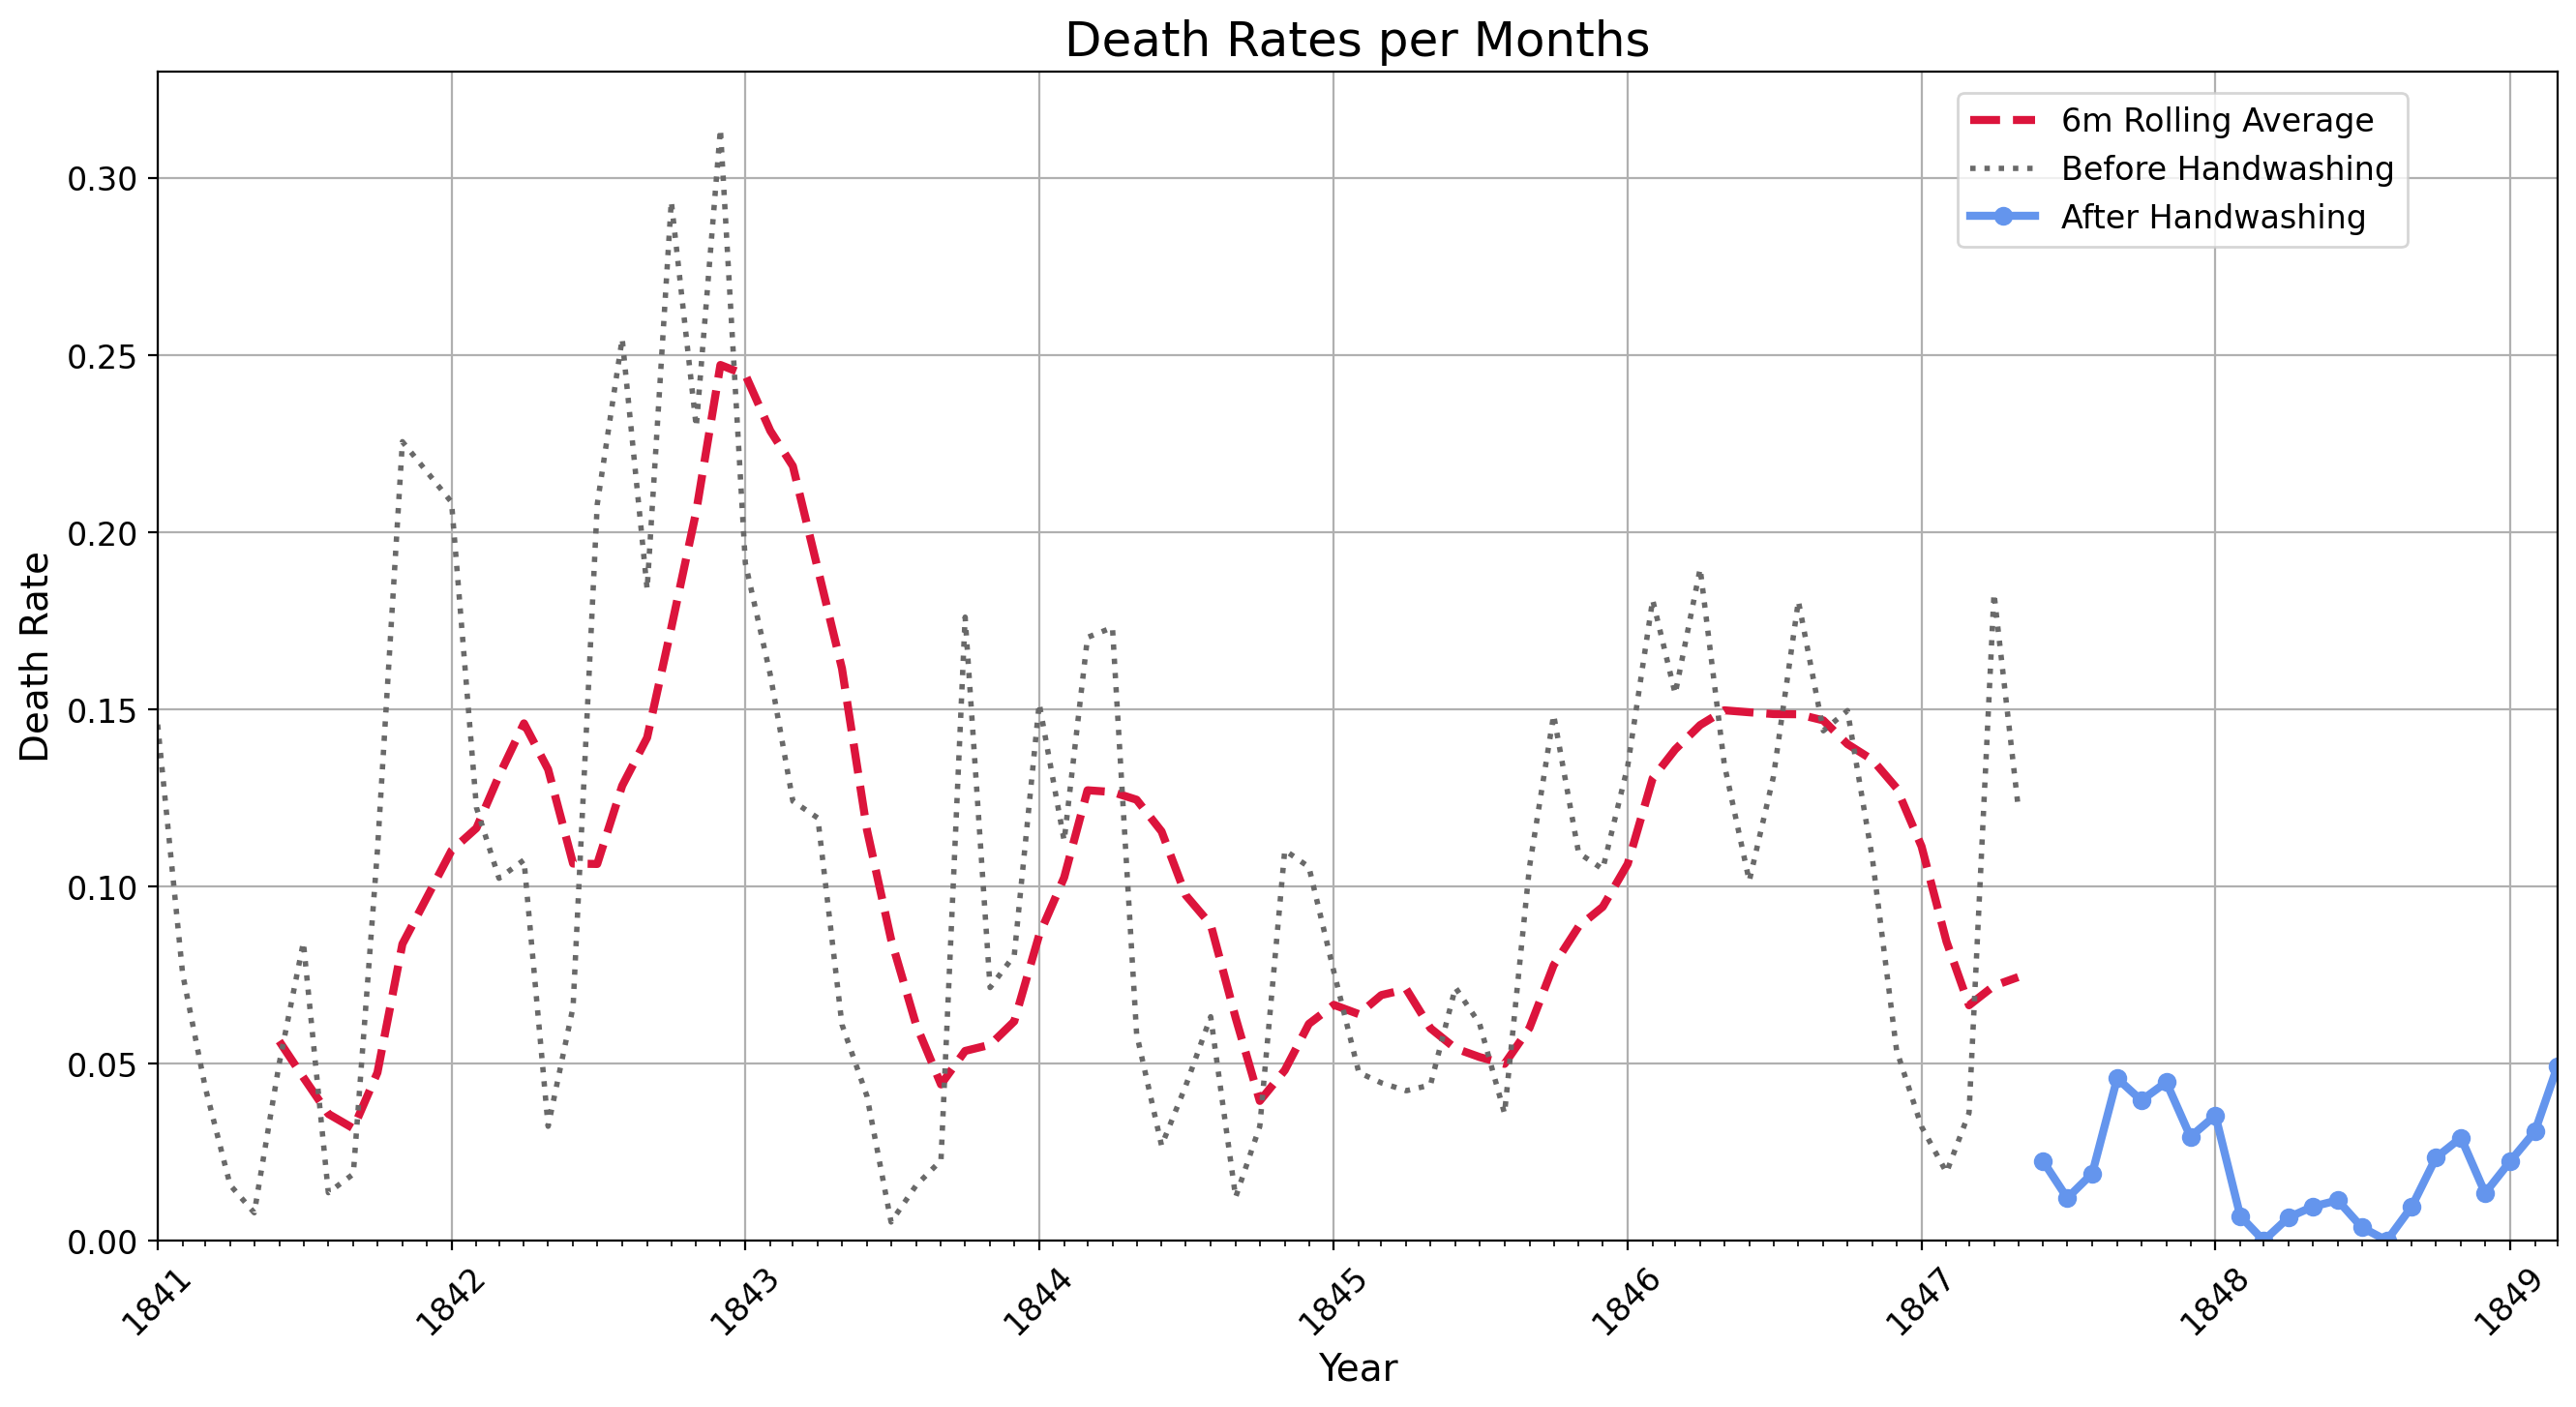

In [50]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Death Rates per Months', fontsize=18)
plt.grid()
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# 6-month Rolling Average
plt.plot(df_monthly_before_rolling_avg['date'],
         df_monthly_before_rolling_avg['deaths_pct'],
         color='crimson',
         linestyle='--',
         linewidth=3,
         label='6m Rolling Average')

plt.plot(df_monthly_before['date'],
         df_monthly_before['deaths_pct'],
         color='dimgrey',
         linestyle=':',
         linewidth=2,
         label='Before Handwashing')

plt.plot(df_monthly_after['date'],
         df_monthly_after['deaths_pct'],
         color='cornflowerblue',
         linestyle='-',
         linewidth=3,
         marker='o',
         label='After Handwashing')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
#
plt.xlim(df_monthly_before['date'].min(), df_monthly_after['date'].max())
plt.ylim(0, 0.33)

ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # tick locators on x-axis

plt.legend(loc=(0.75, 0.85),
           fontsize=12)

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made
obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in
percentage terms?
* How do these numbers compare to the average for all the 1840s that we
calculated earlier?
* How many times lower are the chances of dying after handwashing compared
to before?

In [57]:
avg_death_rate_before = df_monthly_before['deaths_pct'].mean()
avg_death_rate_after = df_monthly_after['deaths_pct'].mean()

death_rate_difference = avg_death_rate_before - avg_death_rate_after
print(f"Difference of average death rate = {death_rate_difference * 100:.2} %")

death_rate_ratio = avg_death_rate_after / avg_death_rate_before
print(f"Ratio of average death rate = {death_rate_ratio:.2} / {1}")

Difference of average death rate = 8.4 %
Ratio of average death rate = 0.2 / 1


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](
https://numpy.org/doc/stable/reference/generated/numpy.where.html)
to add a column to `df_monthly` that shows if a particular date was before or
after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed
as a result of the new policy?

In [61]:
before_after_col = np.where(df_monthly['date'] < handwashing_start,
                            'before', 'after')

df_monthly.insert(loc=1, column='handwashing', value=before_after_col)

In [72]:
bef_aft_box = px.box(df_monthly,
                     x='handwashing',
                     y='deaths_pct',
                     title='Death Rate Before & After Handwashing',
                     points='all',
                     notched=True)

bef_aft_box.update_layout(xaxis_title='Time (before / after handwashing)',
                          yaxis_title='Death Rate')

bef_aft_box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: <br>
Create a [plotly histogram](
https://plotly.com/python/histograms/)
to show the monthly percentage of deaths.

* Use docs to check out the available parameters.
Use the [`color` parameter](
https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html)
to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing.
Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slightly transparent.
* Experiment with the number of bins on the histogram.
Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using
the `marginal` parameter.

In [99]:
death_rate_hist = px.histogram(df_monthly,
                               x='deaths_pct',
                               title='Death Rate per Year',
                               color='handwashing',
                               nbins=30,
                               histnorm='percent',
                               opacity=0.7,
                               barmode='overlay',
                               marginal='box')

death_rate_hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                              yaxis_title='Count')

death_rate_hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: <br>
Use [Seaborn's `.kdeplot()`](
https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
to create two kernel density estimates of the `pct_deaths`, one for
before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


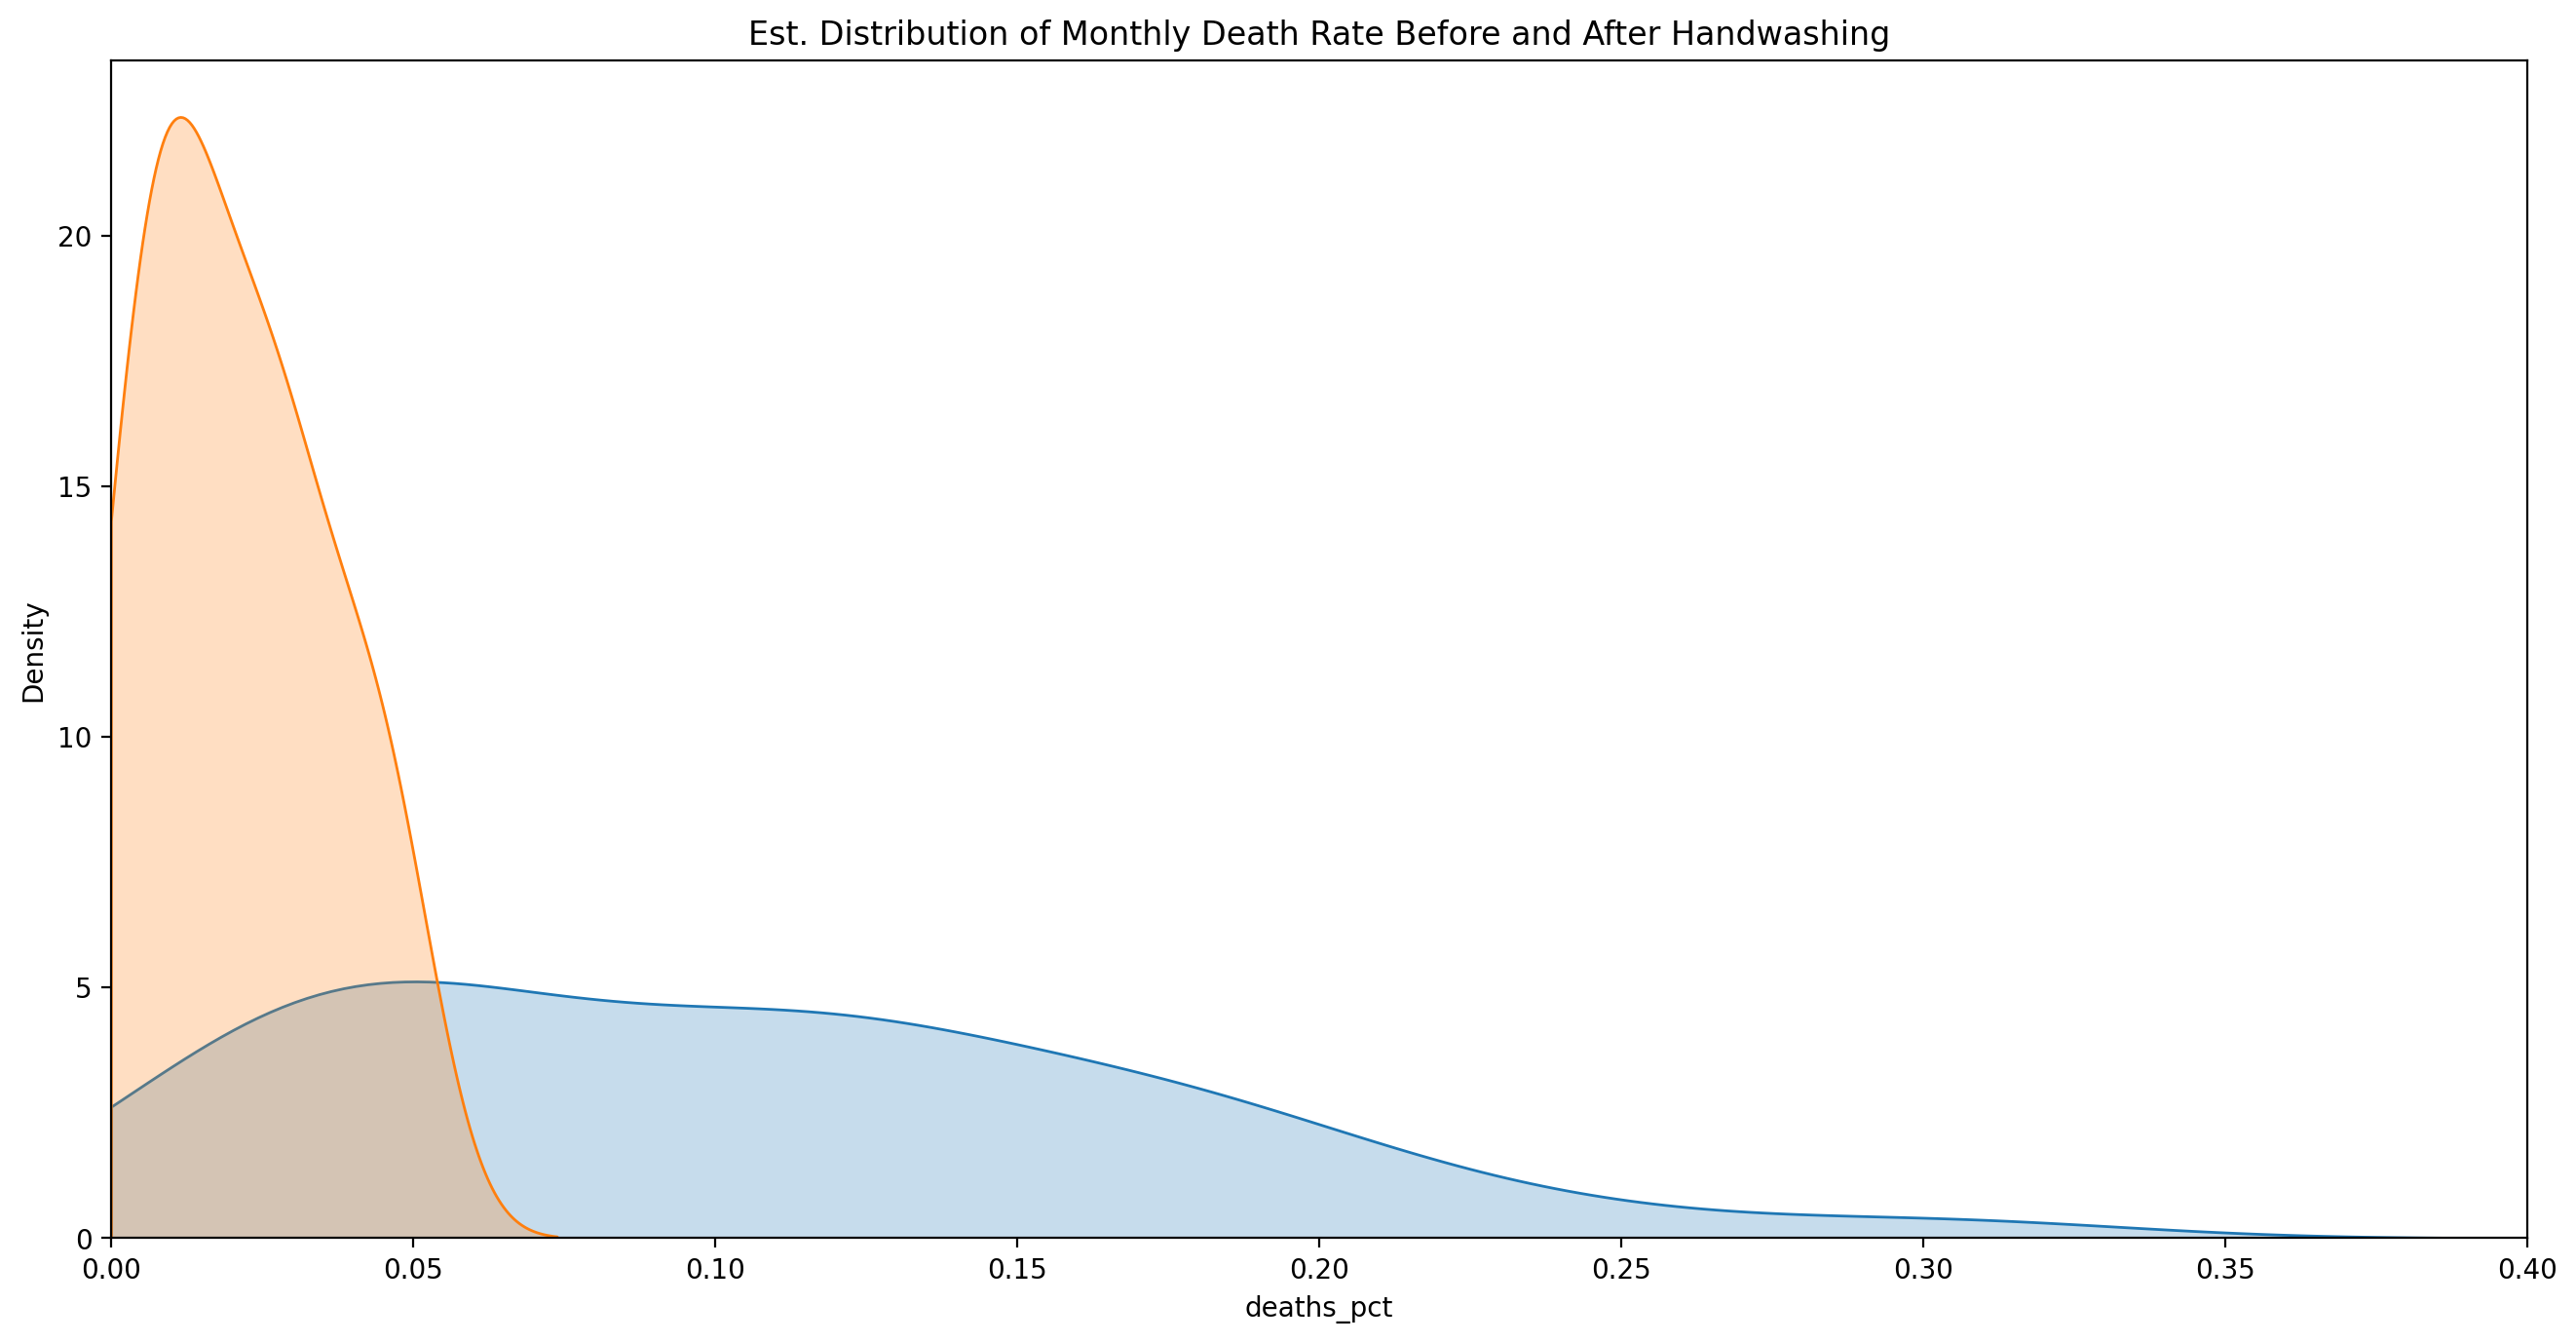

In [113]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')

# I HAVE NO IDEA HOW THIS WORKS !!!
# I ONLY KNOW IT'S SIMILAR TO HISTOGRAM
kde_before = sns.kdeplot(df_monthly_before['deaths_pct'],
                         shade=True,
                         clip=(0,1)) # Because we get a NEGATIVE death rate without 'clip'

kde_after = sns.kdeplot(df_monthly_after['deaths_pct'],
                        shade=True,
                        clip=(0,1)) # Because we get a NEGATIVE death rate without 'clip'

plt.xlim(0, 0.4)
plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: <br>
Use a t-test to determine if the differences in the means are statistically
significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has
made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically
significant at the 99% level?

In [124]:
t_stat, p_val = stats.ttest_ind(a=df_monthly_before['deaths_pct'],
                            b=df_monthly_after['deaths_pct'])

print(f"t-statistic = {t_stat:.2f} \n"
      f"p-value = {p_val:.3e}")

t-statistic = 5.51 
p-value = 2.985e-07


What do you conclude from your analysis, Doctor? 😊

Because p_value is so low (far below 1 %), we can say the
difference in means is highly statistically significant.
**Handwashing definitely is beneficial!**